In [1]:
import cftime
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import scipy.io as sio
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.util as util
import xarray as xr
import cmocean
import numpy as np
import matplotlib.path as mpath
import pandas as pd
plt.rc('font',family='Arial')

import cartopy.crs as ccrs

def AlbersMap(limits=[-79, 19, 36, 79],cent_lon=-30,cent_lat=57.5,stand_par=(50,65)):
     #[left, right, bottom, top]
    
    proj = ccrs.AlbersEqualArea(central_longitude=cent_lon,
                                central_latitude=cent_lat,
                                standard_parallels=stand_par)
    
    ax = plt.axes(projection=proj) 
    
    ax.set_extent(limits, crs=ccrs.PlateCarree())
    
    vertices = [(lon, limits[2]) for lon in range(limits[0], limits[1], 1)] + \
               [(lon, limits[3]) for lon in range(limits[1], limits[0], -1)]
    
    boundary = mpath.Path(vertices)
    ax.set_boundary(boundary, transform=ccrs.PlateCarree())

    return ax

def prep4plot(tlat,tlon,X):
    tlon = np.where(np.greater_equal(tlon,min(tlon[:,0])),tlon-360,tlon)

    tlon = np.concatenate((tlon,tlon+360),1)
    tlat = np.concatenate((tlat,tlat),1)
    X = np.concatenate((X,X),1)

    tlon = tlon-360.

    return tlat,tlon,X

In [2]:
ds = xr.open_mfdataset('/Users/Sean/Documents/MATLAB/SALT.mean.nc')

ds_u = xr.open_dataset('/Users/Sean/Documents/MATLAB/UVEL.ensmean.nc')
ds_v = xr.open_dataset('/Users/Sean/Documents/MATLAB/VVEL.ensmean.nc')
                
time_new = ds.time-datetime.timedelta(seconds=1)
time_new

ds['time'] = time_new

time_new = ds_u.time-datetime.timedelta(seconds=1)
time_new

ds_u['time'] = time_new
ds_v['time'] = time_new

In [3]:
salt_amean = ds.SALT.squeeze(dim='z_t').groupby('time.year').mean(dim='time')
u_amean = ds_u.UVEL.squeeze(dim='z_t').groupby('time.year').mean(dim='time')
v_amean = ds_v.VVEL.squeeze(dim='z_t').groupby('time.year').mean(dim='time')

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [22]:
tlat,tlon,grid = prep4plot(salt_amean['TLAT'],salt_amean['TLONG'],salt_amean.sel(year=2100).values)

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [4]:
ds_angle = xr.open_dataset('/Users/Sean/Documents/MATLAB/b.e11.BRCP85C5CNBDRD.f09_g16.101.pop.h.FG_CO2.200601-210012.nc',
                    decode_times=False)

v = v_amean.sel(year=2050)/100
u = u_amean.sel(year=2050)/100
u = np.cos(ds_angle['ANGLE'])*u - np.sin(ds_angle['ANGLE'])*v; 
v = np.sin(ds_angle['ANGLE'])*u + np.cos(ds_angle['ANGLE'])*v;
u = u.persist()
v = v.persist()
magnitude = (u ** 2 + v ** 2) ** 0.5
magnitude.persist()

<xarray.DataArray (nlat: 384, nlon: 320)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [0.      , 0.      , 0.      , ...,      nan,      nan, 0.      ],
       [0.003579, 0.0052  , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])
Coordinates:
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    z_t      float32 40878.465
    year     int64 2050
Dimensions without coordinates: nlat, nlon

In [13]:
u_amean.year

<xarray.DataArray 'year' (year: 111)>
array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037,
       2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061,
       2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073,
       2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085,
       2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097,
       2098, 2099, 2100])
Coordinates:
    z_t      float32 40878.465
  * year     (year) int64 1920 1921 1922 1923 1924 ... 2096 2097 2098 2099 2100

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in less
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in greater
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


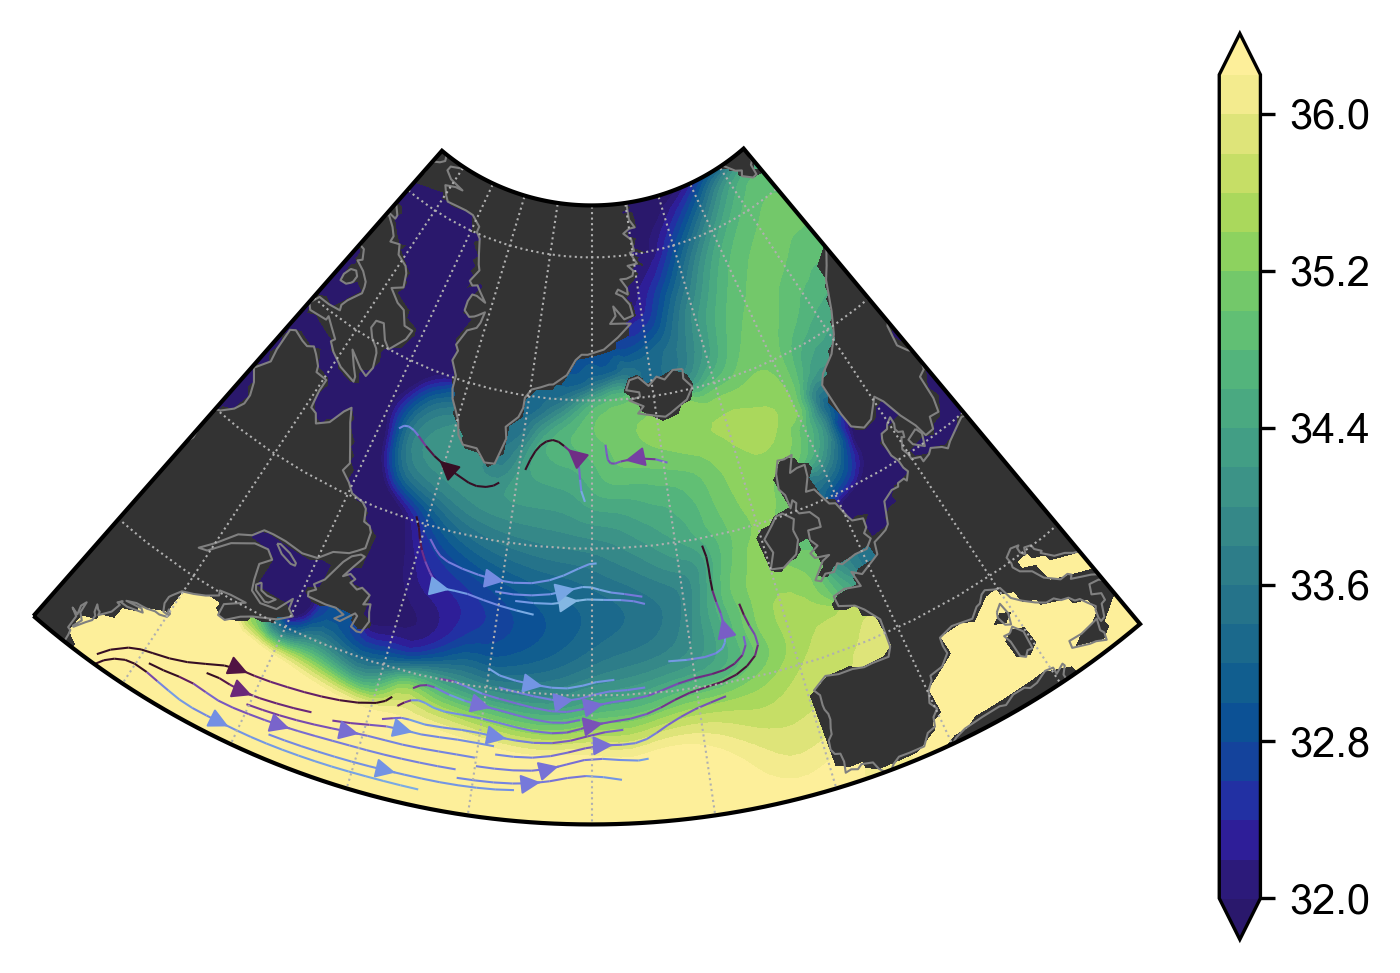

In [24]:
minvalue_conc = 32
maxvalue_conc = 36

nsteps = 20
cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

fig_dpi = 300
coast_color = '0.5'
bg_color = '0.2'


fig = plt.figure(dpi=fig_dpi)

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,cbarstep)

ax = AlbersMap(limits=[-79, 19, 36, 79],cent_lon=-30,cent_lat=57.5,stand_par=(50,65))

conc = ax.contourf(tlon[:,250:450],tlat[:,250:450],grid[:,250:450],
              transform=ccrs.PlateCarree(),
              cmap=cmocean.cm.haline,
              levels=contour_levs,
              extend='both')

minvalue_vel = 0
maxvalue_vel = 0.05

strm = ax.streamplot(ds_u.ULONG.values, ds_u.ULAT.values, u.where(magnitude > 0.01).values, v.where(magnitude > 0.01).values,
              transform=ccrs.PlateCarree(),
              linewidth=0.5,
              density=2, 
              color=magnitude.values,
              cmap=cmocean.cm.dense,
              norm=colors.Normalize(vmin=minvalue_vel, vmax=maxvalue_vel))

cbar1 = fig.colorbar(conc, ticks=contour_labels)
# cbar2 = fig.colorbar(strm.lines)
# cb.set_label(label=r'mmol C m^{-3}',fontsize=20)

gl = ax.gridlines(linewidth=0.5,linestyle='dotted')

gl.xlocator=mticker.FixedLocator(np.arange(50,-100,-10))
gl.ylocator=mticker.FixedLocator(np.arange(35,95,10))

ax.set_facecolor(color=bg_color)

ax.coastlines(resolution='110m',linewidth=0.5,color = '0.5')

In [6]:
fg_ant = sio.loadmat('/Users/Sean/Documents/MATLAB/FG_ANT_CO2.mat')
fg_ant = np.transpose(fg_ant['FG_ANT_CO2'])

In [7]:
fg_ant.shape

(111, 384, 320)

In [8]:
fg_ant = xr.DataArray(fg_ant,dims=['year','nlat','nlon'])
fg_ant['year']=salt_amean.year[-111:]

In [9]:
tlat,tlon,grid = prep4plot(salt_amean['TLAT'],salt_amean['TLONG'],fg_ant.sel(year=1990).values)

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in less
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in greater
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


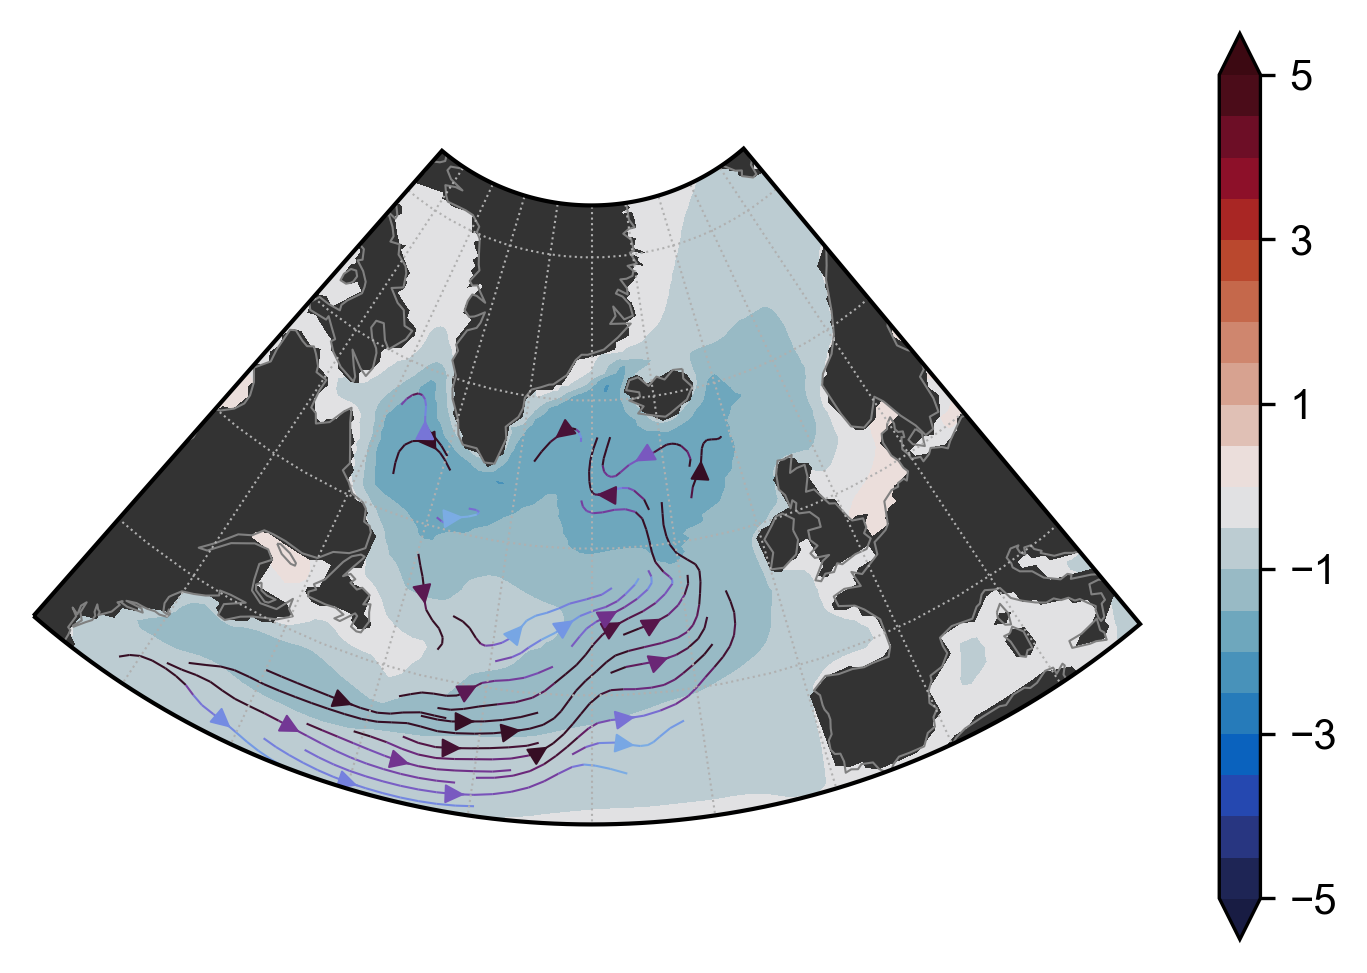

In [37]:
minvalue_conc = -5
maxvalue_conc = 5

nsteps = 20
cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

fig_dpi = 300
coast_color = '0.5'
bg_color = '0.2'


fig = plt.figure(dpi=fig_dpi)

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,cbarstep)

ax = AlbersMap(limits=[-79, 19, 36, 79],cent_lon=-30,cent_lat=57.5,stand_par=(50,65))

conc = ax.contourf(tlon[:,250:450],tlat[:,250:450],-grid[:,250:450],
              transform=ccrs.PlateCarree(),
              cmap=cmocean.cm.balance,
              levels=contour_levs,
              extend='both')

minvalue_vel = 0
maxvalue_vel = 0.05

strm = ax.streamplot(ds_u.ULONG.values, ds_u.ULAT.values, u.where(magnitude > 0.01).values, v.where(magnitude > 0.01).values,
              transform=ccrs.PlateCarree(),
              linewidth=0.5,
              density=2, 
              color=magnitude.values,
              cmap=cmocean.cm.dense,
              norm=colors.Normalize(vmin=minvalue_vel, vmax=maxvalue_vel))

cbar1 = fig.colorbar(conc, ticks=contour_labels)

gl = ax.gridlines(linewidth=0.5,linestyle='dotted')

gl.xlocator=mticker.FixedLocator(np.arange(50,-100,-10))
gl.ylocator=mticker.FixedLocator(np.arange(35,95,10))

ax.set_facecolor(color=bg_color)

ax.coastlines(resolution='110m',linewidth=0.5,color = '0.5')

In [26]:
tlat,tlon,grid = prep4plot(salt_amean['TLAT'],salt_amean['TLONG'],fg_ant.sel(year=1990).values)
# grid_exp = grid*((677.078-280)/(353.855-280))# 2060
grid_exp = grid*((540.543-280)/(353.855-280)) # 2050
# grid_exp = grid*((758.182-280)/(353.855-280)) # 2080

In [29]:
tlat,tlon,grid = prep4plot(salt_amean['TLAT'],salt_amean['TLONG'],fg_ant.sel(year=2050).values)

/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in less
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
/Users/Sean/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/vector_transform.py:138: RuntimeWarning: invalid value encountered in greater
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


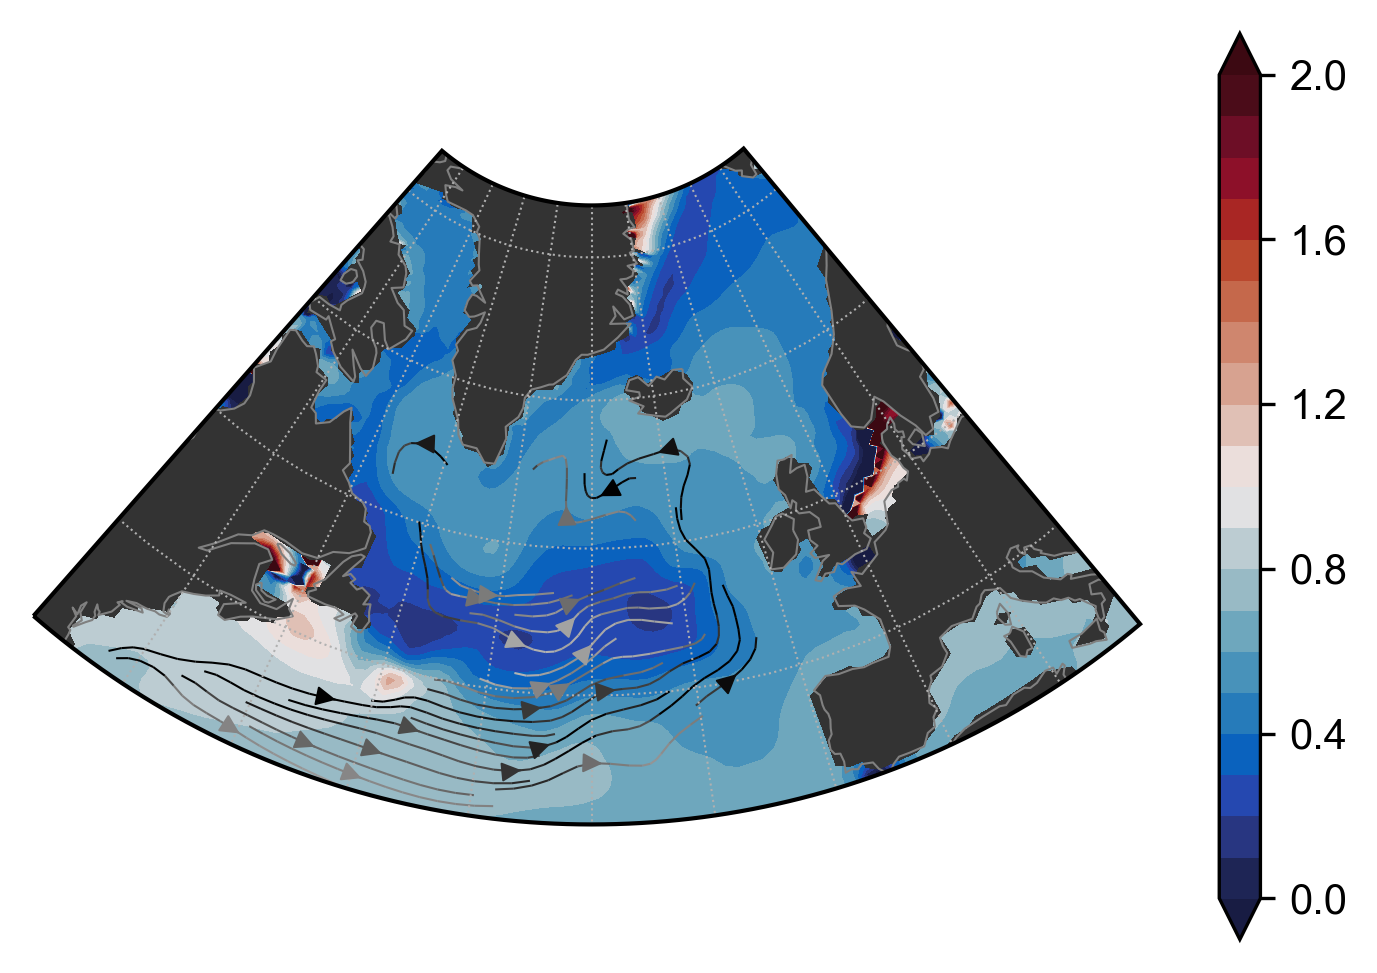

In [43]:
minvalue_conc = 0
maxvalue_conc = 2

nsteps = 20
cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

fig_dpi = 300
coast_color = '0.5'
bg_color = '0.2'


fig = plt.figure(dpi=fig_dpi)

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,cbarstep)

ax = AlbersMap(limits=[-79, 19, 36, 79],cent_lon=-30,cent_lat=57.5,stand_par=(50,65))

conc = ax.contourf(tlon[:,250:450],tlat[:,250:450],(grid[:,250:450]/grid_exp[:,250:450]),
              transform=ccrs.PlateCarree(),
              cmap=cmocean.cm.balance,
              levels=contour_levs,
              extend='both')

minvalue_vel = 0
maxvalue_vel = 0.05

strm = ax.streamplot(ds_u.ULONG.values, ds_u.ULAT.values, u.where(magnitude > 0.01).values, v.where(magnitude > 0.01).values,
              transform=ccrs.PlateCarree(),
              linewidth=0.5,
              density=2, 
              color=magnitude.values,
              cmap=cmocean.cm.gray_r,
              norm=colors.Normalize(vmin=minvalue_vel, vmax=maxvalue_vel))

cbar1 = fig.colorbar(conc, ticks=contour_labels)

gl = ax.gridlines(linewidth=0.5,linestyle='dotted')

gl.xlocator=mticker.FixedLocator(np.arange(50,-100,-10))
gl.ylocator=mticker.FixedLocator(np.arange(35,95,10))

ax.set_facecolor(color=bg_color)

ax.coastlines(resolution='110m',linewidth=0.5,color = '0.5')

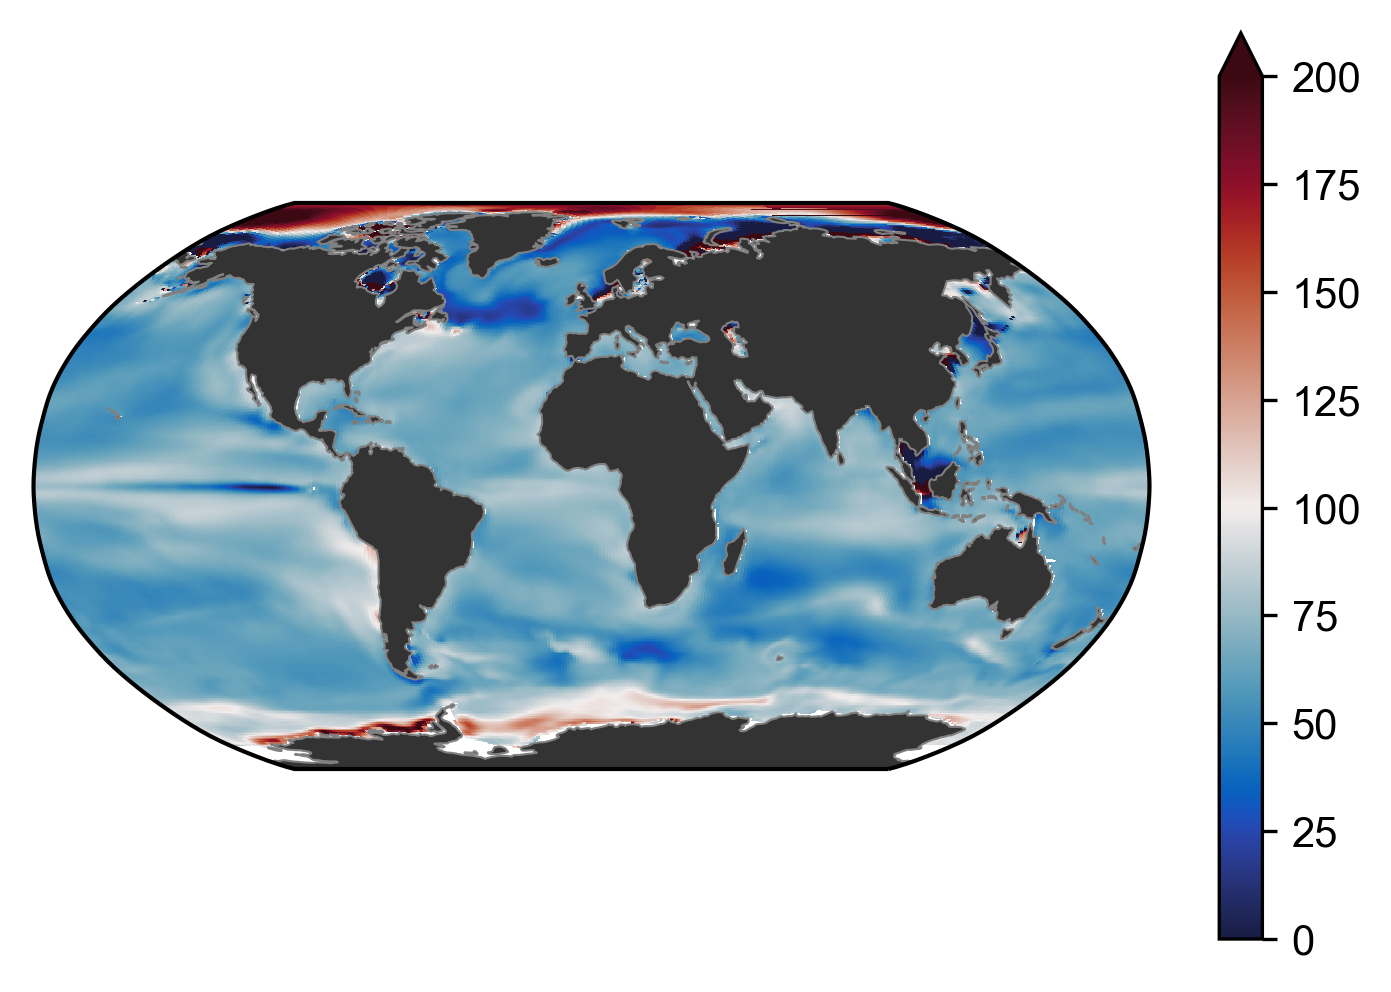

In [33]:
fig_dpi = 300
coast_color = '0.5'
bg_color = '0.2'

fig = plt.figure(dpi=fig_dpi)
ax = plt.axes(projection=ccrs.Robinson())

# ax = plt.gca()
# ax.set_facecolor(color=bg_color)

ax.set_global()

cax = plt.pcolormesh(tlon[:,0:450],tlat[:,0:450],(grid[:,0:450]/grid_exp[:,0:450])*100,
                     cmap=cmocean.cm.balance,
                     transform=ccrs.PlateCarree(),
                     vmin = 0, vmax = 200)

ax.add_feature(cart.feature.NaturalEarthFeature('physical', 'land', '110m',
                                                edgecolor = coast_color,
                                                linewidth = 0.5,
                                                facecolor = bg_color))

# ax.coastlines(resolution='110m',linewidth=0.5,color = coast_color)



plt.colorbar(cax,extend='max')


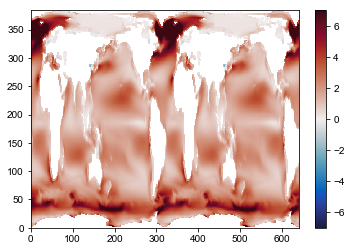

In [20]:
cax = plt.pcolormesh(grid_exp,
                     cmap=cmocean.cm.balance,
                     vmin = -7, vmax = 7)
plt.colorbar(cax)

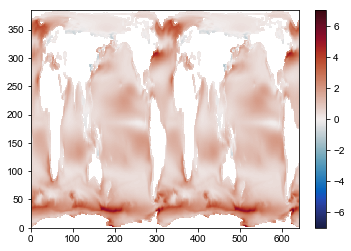

In [21]:
cax = plt.pcolormesh(grid,
                     cmap=cmocean.cm.balance,
                     vmin = -7, vmax = 7)
plt.colorbar(cax)